In [26]:
from datetime import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from twitter_fetcher.tweet_features import TweetFeatures

In [2]:
# read in the extracted features from CSV file (and parse the tweet created_at column as the index)
features_filename = "realDonaldTrump_tweets/features.csv"
features_df = pd.read_csv(features_filename, header=0, parse_dates=['created_at'], index_col='created_at')
features_df = features_df.sort_index()

In [8]:
features_df.shape

(3422, 4)

In [3]:
features_df.dtypes

id             int64
source        object
is_retweet      bool
text_len       int64
dtype: object

In [5]:
features_df.index

DatetimeIndex(['2020-01-01 01:17:43+00:00', '2020-01-01 01:16:27+00:00',
               '2020-01-01 01:08:27+00:00', '2020-01-01 01:07:22+00:00',
               '2020-01-01 01:06:21+00:00', '2020-01-01 01:06:17+00:00',
               '2020-01-01 01:05:52+00:00', '2020-01-01 01:05:29+00:00',
               '2020-01-01 01:03:52+00:00', '2020-01-01 01:03:15+00:00',
               ...
               '2020-04-11 21:36:48+00:00', '2020-04-11 21:08:43+00:00',
               '2020-04-11 18:53:59+00:00', '2020-04-11 18:47:39+00:00',
               '2020-04-11 18:43:03+00:00', '2020-04-11 18:33:04+00:00',
               '2020-04-11 18:33:03+00:00', '2020-04-11 16:01:37+00:00',
               '2020-04-10 20:55:29+00:00', '2020-04-10 20:55:21+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', length=3422, freq=None)

In [4]:
features_df.head()

,id,source,is_retweet,text_len
created_at,,,,
2020-01-01 01:17:43+00:00,1212181071988703232,"<a href=""http://twitter.com/download/iphone"" r...",True,140
2020-01-01 01:16:27+00:00,1212180752936374275,"<a href=""http://twitter.com/download/iphone"" r...",False,81
2020-01-01 01:08:27+00:00,1212178740509380608,"<a href=""http://twitter.com/download/iphone"" r...",True,139
2020-01-01 01:07:22+00:00,1212178469389516800,"<a href=""http://twitter.com/download/iphone"" r...",True,140
2020-01-01 01:06:21+00:00,1212178211628572672,"<a href=""http://twitter.com/download/iphone"" r...",True,140


## Autocorrelation (grouped by hour)

In [10]:
hourly_grouped = features_df['id'].resample('H').count()
hourly_grouped

created_at
2019-12-31 22:00:00+00:00     8
2019-12-31 23:00:00+00:00     5
2020-01-01 00:00:00+00:00     7
2020-01-01 01:00:00+00:00    13
2020-01-01 02:00:00+00:00     0
                             ..
2020-04-18 17:00:00+00:00    10
2020-04-18 18:00:00+00:00    10
2020-04-18 19:00:00+00:00    10
2020-04-18 20:00:00+00:00     0
2020-04-18 21:00:00+00:00     2
Freq: H, Name: id, Length: 2616, dtype: int64

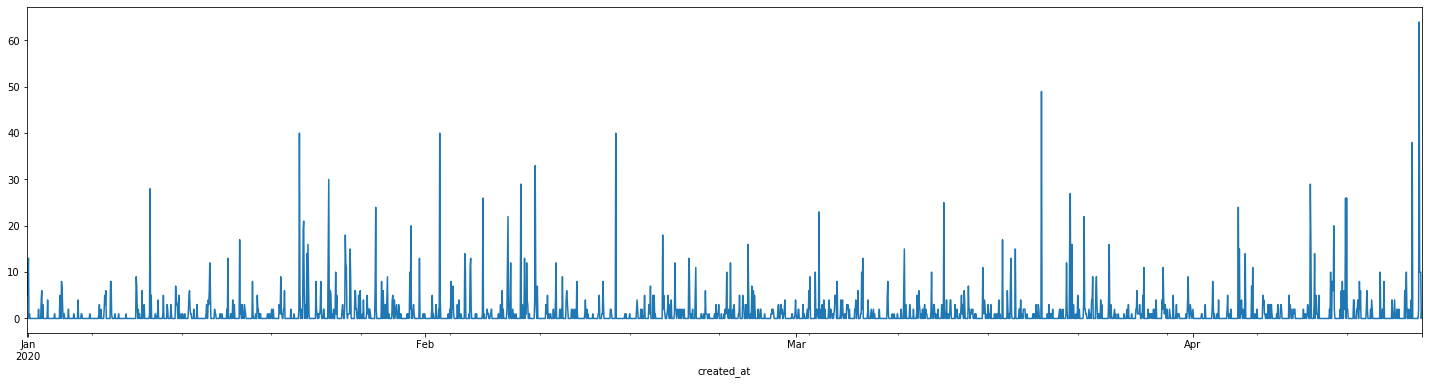

In [18]:
hourly_grouped.plot(kind='line', figsize=(25,6))

In [64]:
# fig, ax = plt.subplots(figsize=(10,8))
# pd.plotting.autocorrelation_plot(hourly_grouped, ax)
# ax.set_xlim(0, 170)
# ax.axvline(24)
# ax.axvline(48)
# ax.axvline(72)
# ax.axvline(96)
# ax.axvline(120)
# ax.axvline(144)
# ax.axvline(168)
# plt.show()

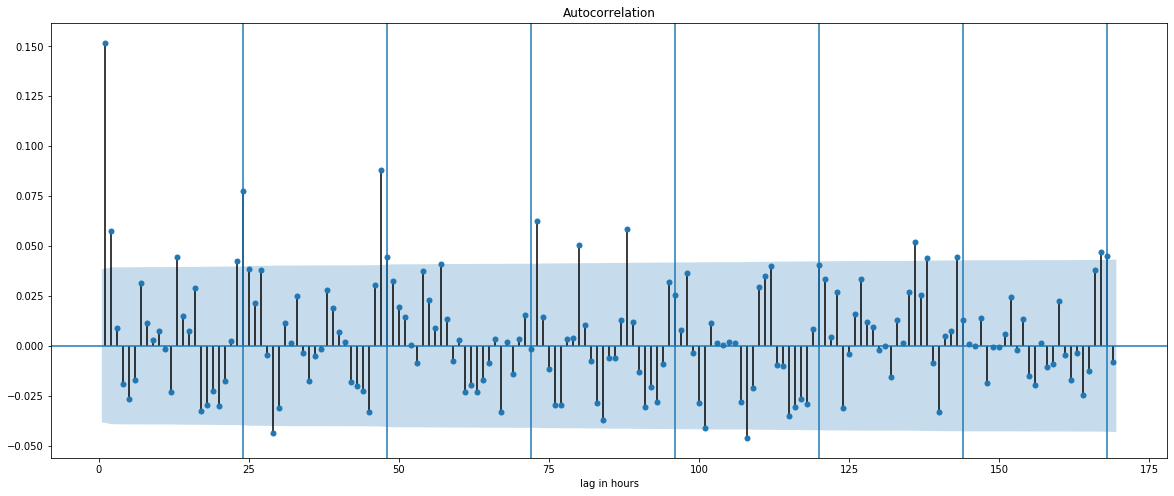

In [48]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(hourly_grouped, ax, lags=np.arange(1,170))
ax.axvline(24)
ax.axvline(48)
ax.axvline(72)
ax.axvline(96)
ax.axvline(120)
ax.axvline(144)
ax.axvline(168)
plt.xlabel('lag in hours')
plt.show()

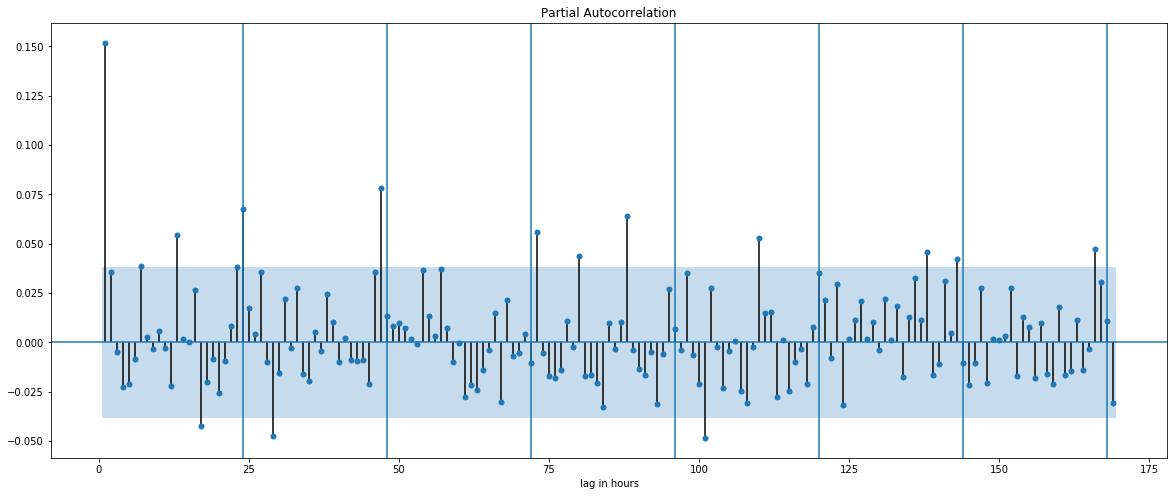

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(hourly_grouped, ax, lags=np.arange(1,170))
ax.axvline(24)
ax.axvline(48)
ax.axvline(72)
ax.axvline(96)
ax.axvline(120)
ax.axvline(144)
ax.axvline(168)
plt.xlabel('lag in hours')
plt.show()

## Autocorrelation (grouped by minute)

In [36]:
minute_grouped = features_df['id'].resample('min').count()
minute_grouped

created_at
2019-12-31 22:24:00+00:00    2
2019-12-31 22:25:00+00:00    2
2019-12-31 22:26:00+00:00    1
2019-12-31 22:27:00+00:00    2
2019-12-31 22:28:00+00:00    0
                            ..
2020-04-18 21:05:00+00:00    0
2020-04-18 21:06:00+00:00    0
2020-04-18 21:07:00+00:00    0
2020-04-18 21:08:00+00:00    0
2020-04-18 21:09:00+00:00    2
Freq: T, Name: id, Length: 156886, dtype: int64

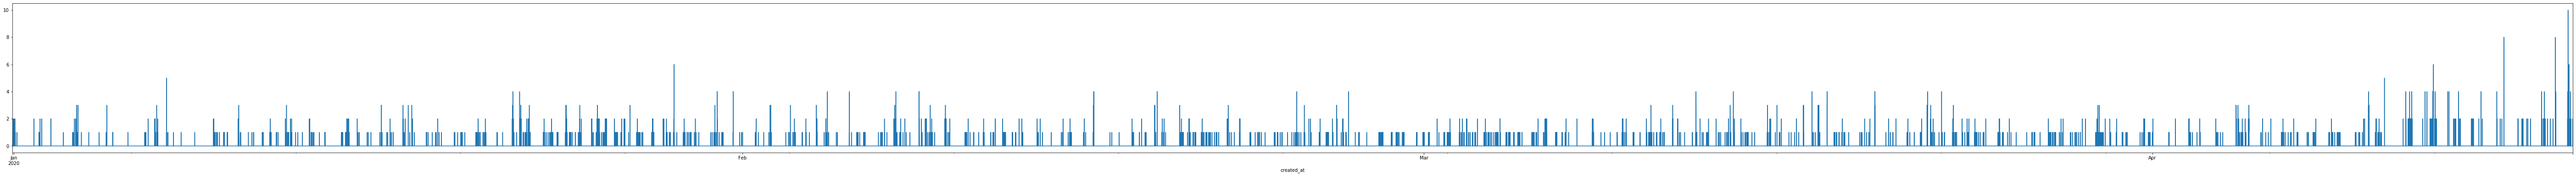

In [63]:
minute_grouped.plot(kind='line', figsize=(100,6))

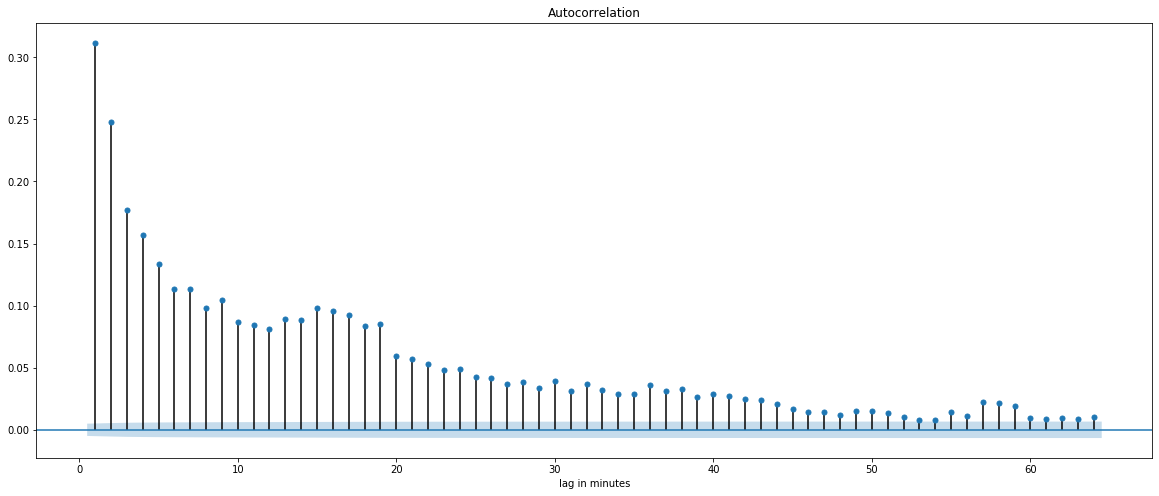

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(minute_grouped, ax, lags=np.arange(1,65))
plt.xlabel('lag in minutes')
plt.show()

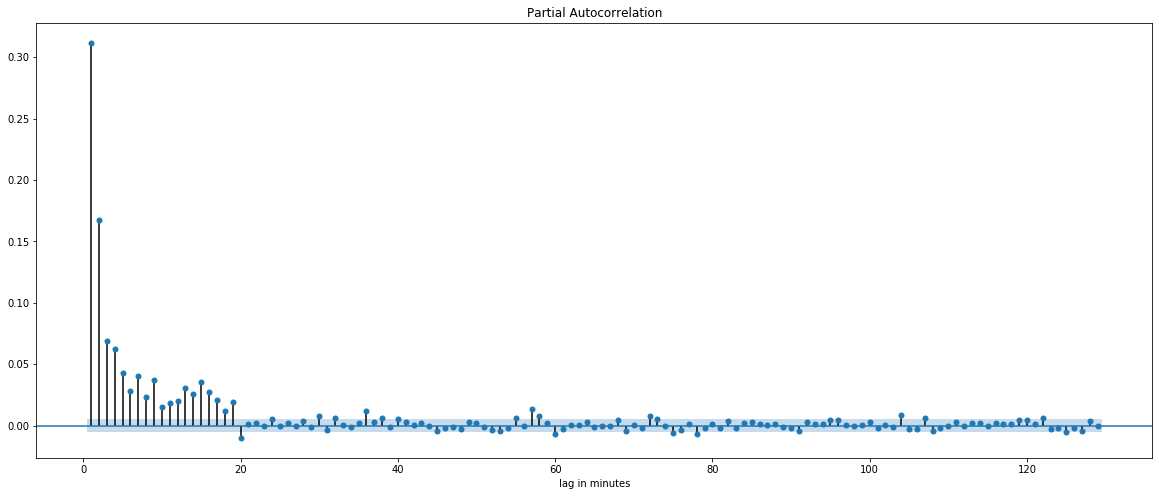

In [51]:
fig, ax = plt.subplots(figsize=(20,8))
plot_pacf(minute_grouped, ax, lags=np.arange(1,130))
plt.xlabel('lag in minutes')
plt.show()

## Autocorrelation (grouped by day)

In [52]:
daily_grouped = features_df['id'].resample('D').count()
daily_grouped

created_at
2019-12-31 00:00:00+00:00     13
2020-01-01 00:00:00+00:00     23
2020-01-02 00:00:00+00:00     17
2020-01-03 00:00:00+00:00     27
2020-01-04 00:00:00+00:00      7
                            ... 
2020-04-14 00:00:00+00:00     32
2020-04-15 00:00:00+00:00     24
2020-04-16 00:00:00+00:00     14
2020-04-17 00:00:00+00:00     30
2020-04-18 00:00:00+00:00    140
Freq: D, Name: id, Length: 110, dtype: int64

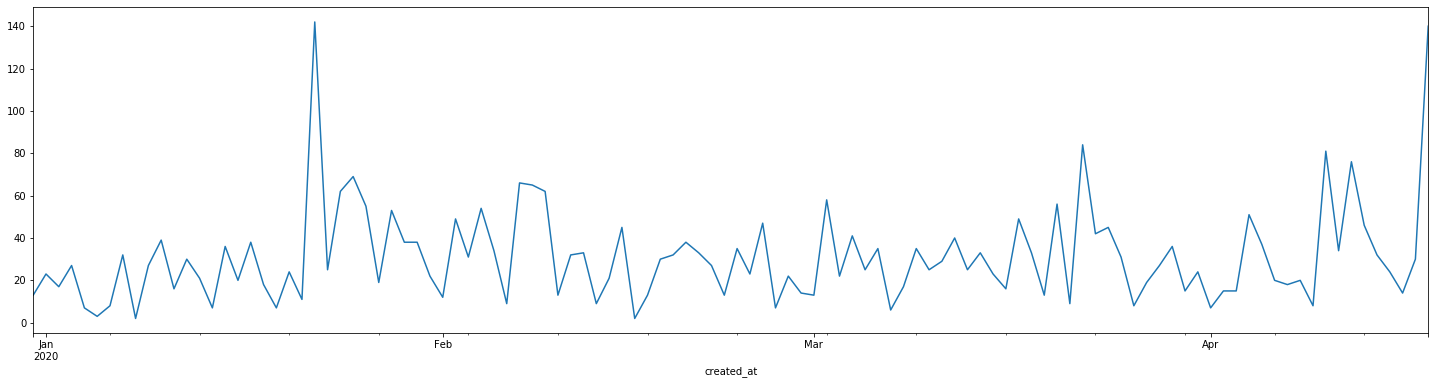

In [61]:
daily_grouped.plot(kind='line', figsize=(25,6))

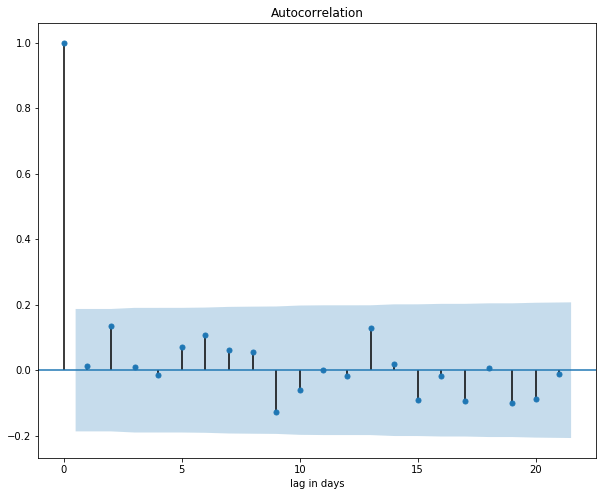

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
plot_acf(daily_grouped, ax)
plt.xlabel('lag in days')
plt.show()

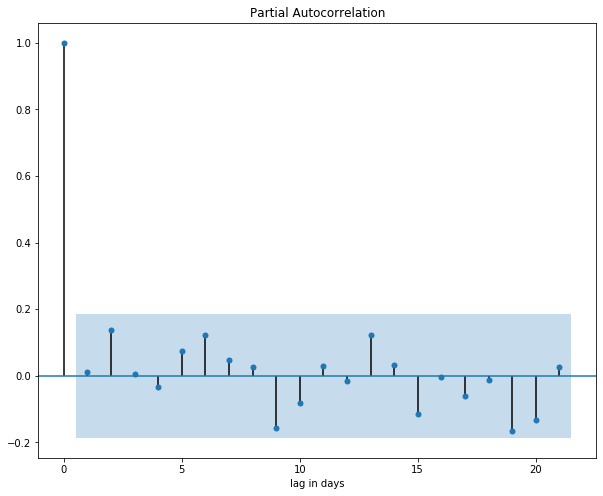

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
plot_pacf(daily_grouped, ax)
plt.xlabel('lag in days')
plt.show()

## Conclusion

The hour-grouping partial autocorrelation graph shows the strongest correlation at a lag of 1 hour, but there are also some statistically signficant correlations (alpha = 0.05) with lags of 24, 47, and 73 hours (which are roughly 1, 2, and 3 days). There is also a barely statistically significant correlation (again, alpha = 0.05) with a lag of 166 hours (roughly 1 week), but this evidence is relatively weak compared to the correlation at a lag of 1 hour. In other words, this partial auto-correlation plot most strongly supports a theory that the pattern of tweeting is "bursty" instead of having strong daily or weekly seasonality/frequency.

The minute-grouping partial autocorrelation graph also shows very strong correlation at a lag of 1 minute, further supporting the "bursty" tweeting pattern theory. Additionally, because the correlation drops to basically statistically insignificant amounts after a lag of greater than 20 minutes (and does not spike at a lag of about 60 minutes), this further provides evidence against the tweeting pattern having some hourly seasonality/frequency.

Additionally, the day-grouping partial autocorrelation graph doesn't show statistically significant correlations (alpha = 0.05), though this may be because the dataset (of ~3200 tweets so far) only spans about 100 days.

In [ ]:
# TODO
# - plot tweets grouped by day of the week e.g. M-Su?
# - plot tweets grouped by hour of the day e.g. 12am-1am, 1am-2am, etc.